In [21]:
import pandas as pd
from sqlalchemy.orm import declarative_base
from sqlalchemy import Column, VARCHAR, Integer, BigInteger
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

engine = create_engine('sqlite:///RTS_SQLite.db')
session = sessionmaker(bind=engine)()
Base = declarative_base()

In [4]:
class RTS_info(Base):
    __tablename__ = "rts_info"

    rts_info_id = Column(Integer, primary_key=True)
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    тип_закупки = Column(VARCHAR)
    номер_закупки = Column(VARCHAR)

    заказ = Column(VARCHAR)

    начальная_цена = Column(BigInteger)
    обеспечение_заявки = Column(BigInteger)
    статус = Column(VARCHAR)

    организатор = Column(VARCHAR)

    заказчик = Column(VARCHAR)

    регион = Column(VARCHAR)
    адрес_поставки = Column(VARCHAR)
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [5]:
# query data
query = session.query(RTS_info)
df = pd.read_sql(query.statement, session.bind)

In [9]:
df.head()

,rts_info_id,тип_закупки,номер_закупки,заказ,начальная_цена,обеспечение_заявки,статус,организатор,заказчик,регион,адрес_поставки
0,1,ЗАКУПКИ МАЛОГО ОБЪЕМА,№6056961,Поставка сырья для хлебобулочного производства...,159780,NaN,Публикация извещения,ОБЛАСТНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ПРОФЕССИОН...,ОБЛАСТНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ПРОФЕССИОН...,Томская область,В соответствии с Техническим заданием
1,2,ЗАКУПКИ МАЛОГО ОБЪЕМА,№6056960,поставка строительных материалов для реализаци...,588851,NaN,Публикация извещения,АДМИНИСТРАЦИЯ ЛОЗОВСКОГО СЕЛЬСОВЕТА БАГАНСКОГО...,ОБЛАСТНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ПРОФЕССИОН...,Томская область,"Новосибирская область, Баганский район, с. Кар..."
2,3,ЗАКУПКИ МАЛОГО ОБЪЕМА,№6056959,Поставка фитингов и запорной арматуры для ТПУ,2507612,NaN,Прием заявок,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ ОБРАЗОВ...,ОБЛАСТНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ПРОФЕССИОН...,Томская область,"г. Томск, пр. Ленина, д. 43 (3-й учебный корпу..."
3,4,ЗАКУПКИ МАЛОГО ОБЪЕМА,№6056957,Оказание услуг на пересчет сметной стоимости п...,70000,NaN,Прием заявок,АДМИНИСТРАЦИЯ НОВОСЕЛЬСКОГО СЕЛЬСОВЕТА КУПИНСК...,ОБЛАСТНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ПРОФЕССИОН...,Томская область,"632750, НОВОСИБИРСКАЯ ОБЛ, КУПИНСКИЙ Р-Н, С НО..."
4,5,44-ФЗ,№0351300072223000554,Поставка лекарственного препарата для медицинс...,500000,0.0,Публикация извещения,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,ОБЛАСТНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ПРОФЕССИОН...,Томская область,"630047, г. Новосибирск, ул. Залесского, д. 6, ..."


<AxesSubplot: >

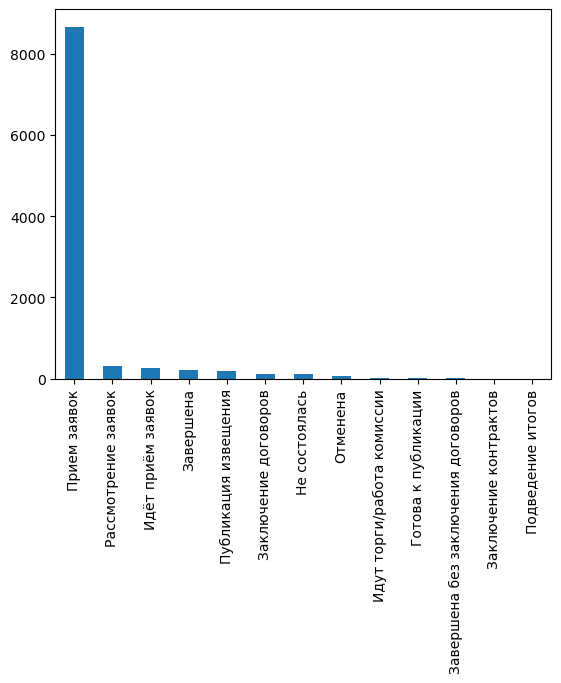

In [7]:
# frequency статус in data
df.статус.value_counts().plot(kind='bar')

<AxesSubplot: >

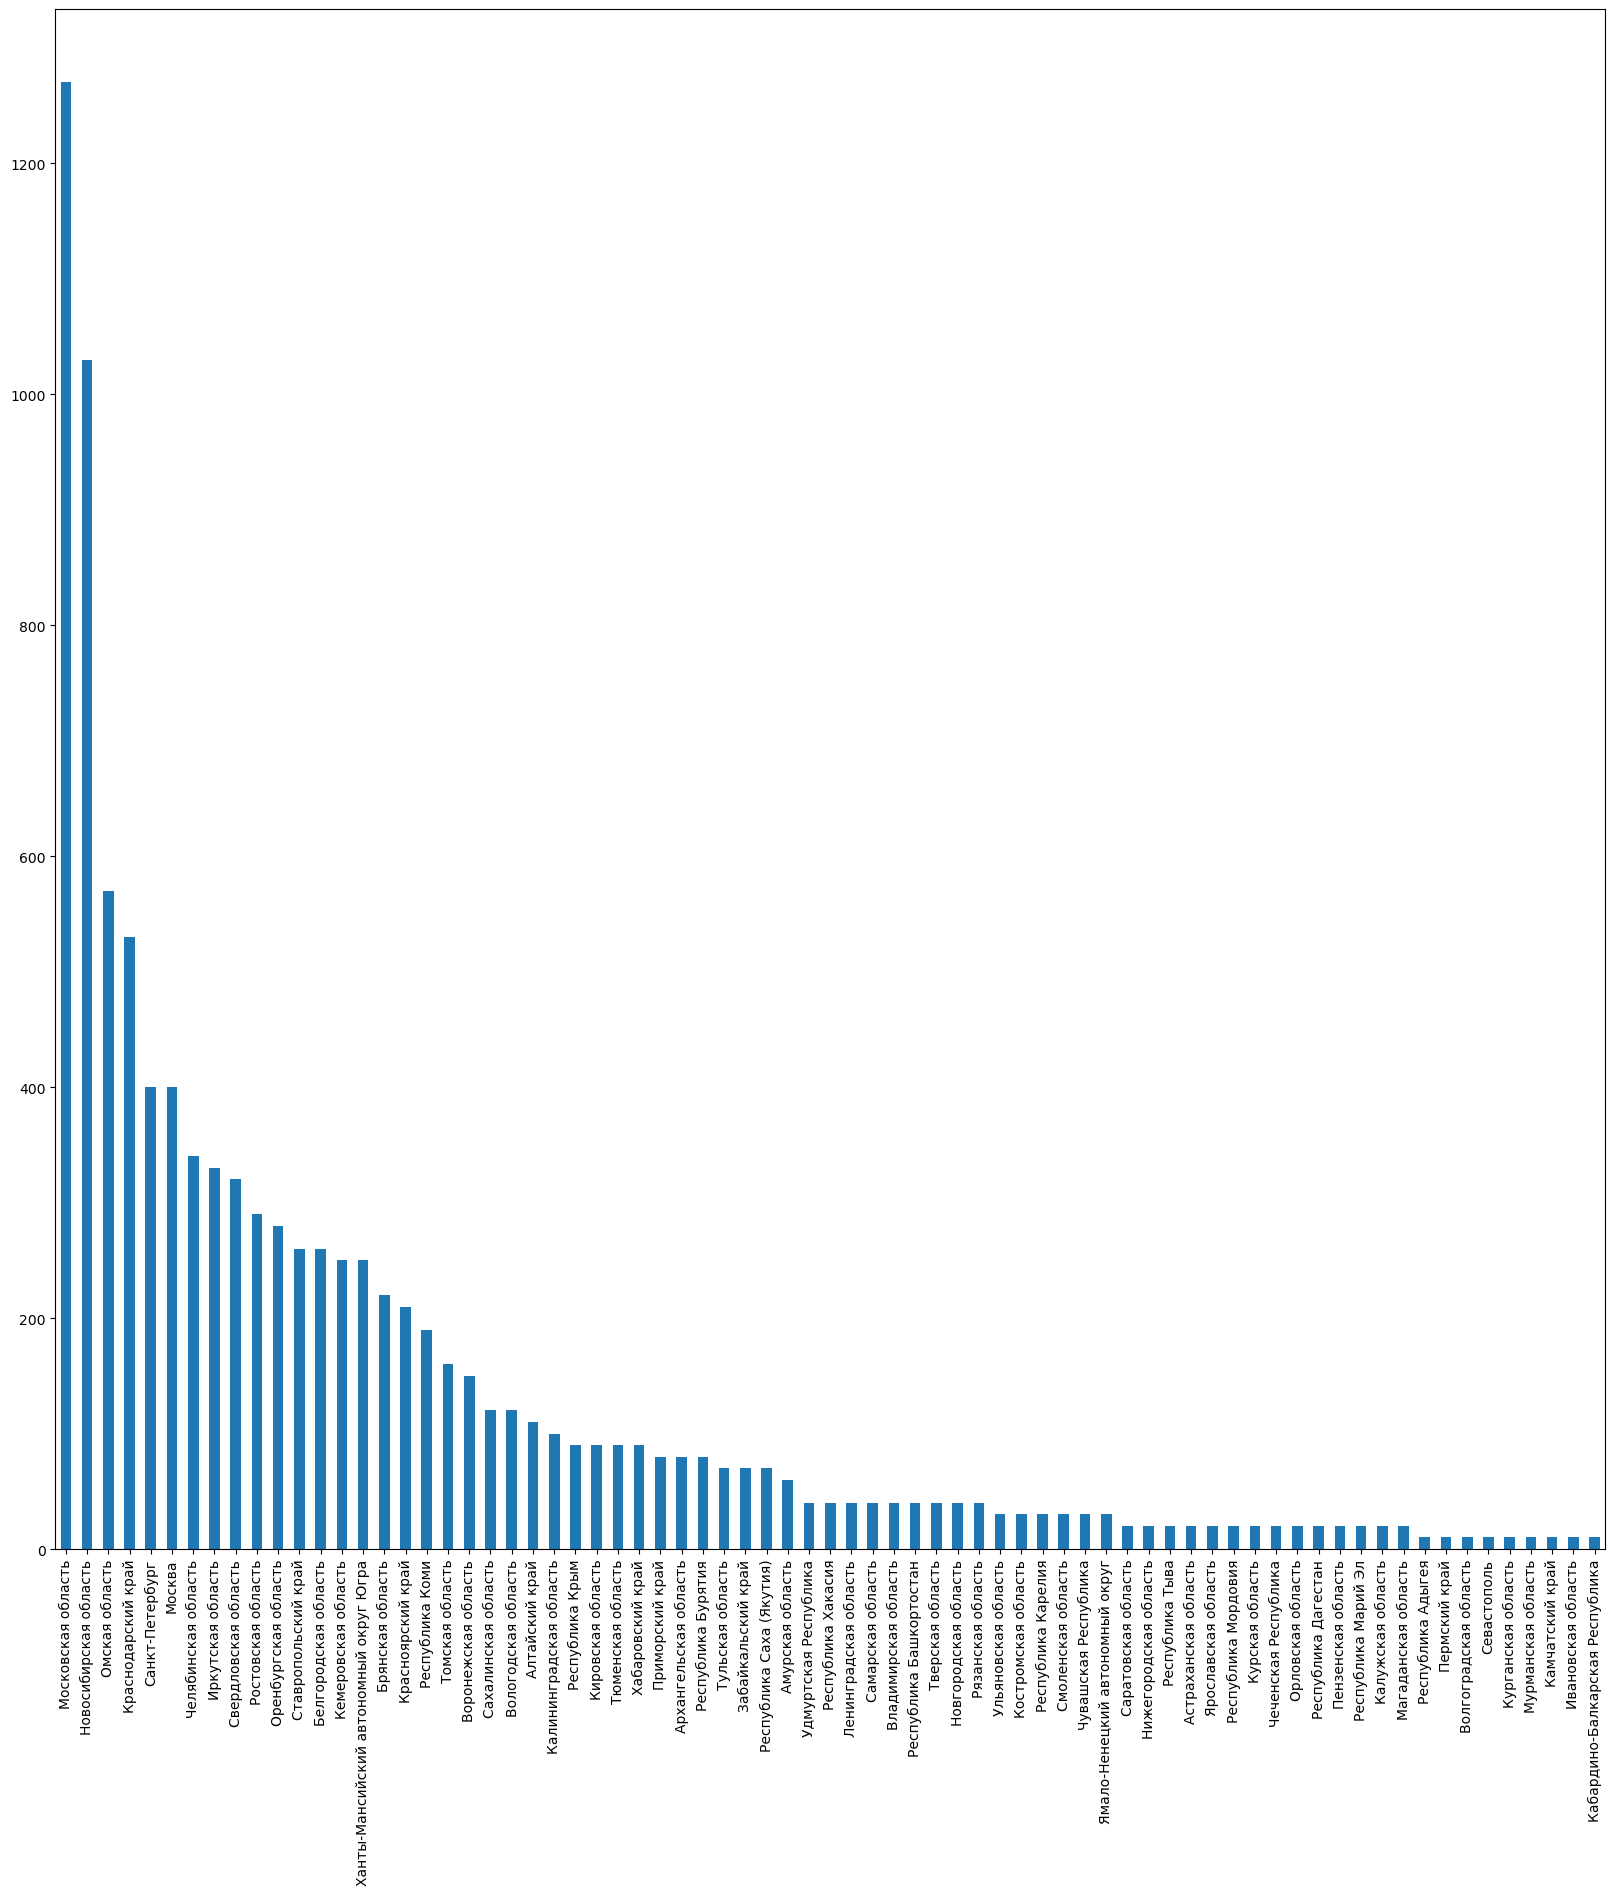

In [11]:
# frequency регион in data
df.регион.value_counts().plot(kind='bar', figsize=(20, 20))

<AxesSubplot: >

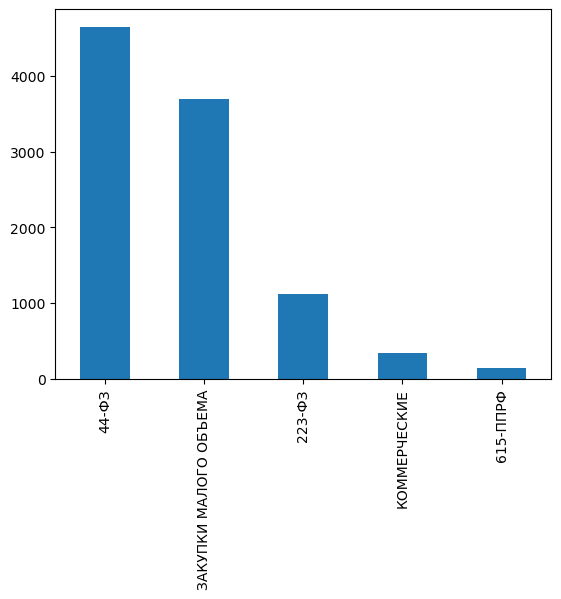

In [13]:
# frequency тип_закупки in data
df.тип_закупки.value_counts().plot(kind='bar',)

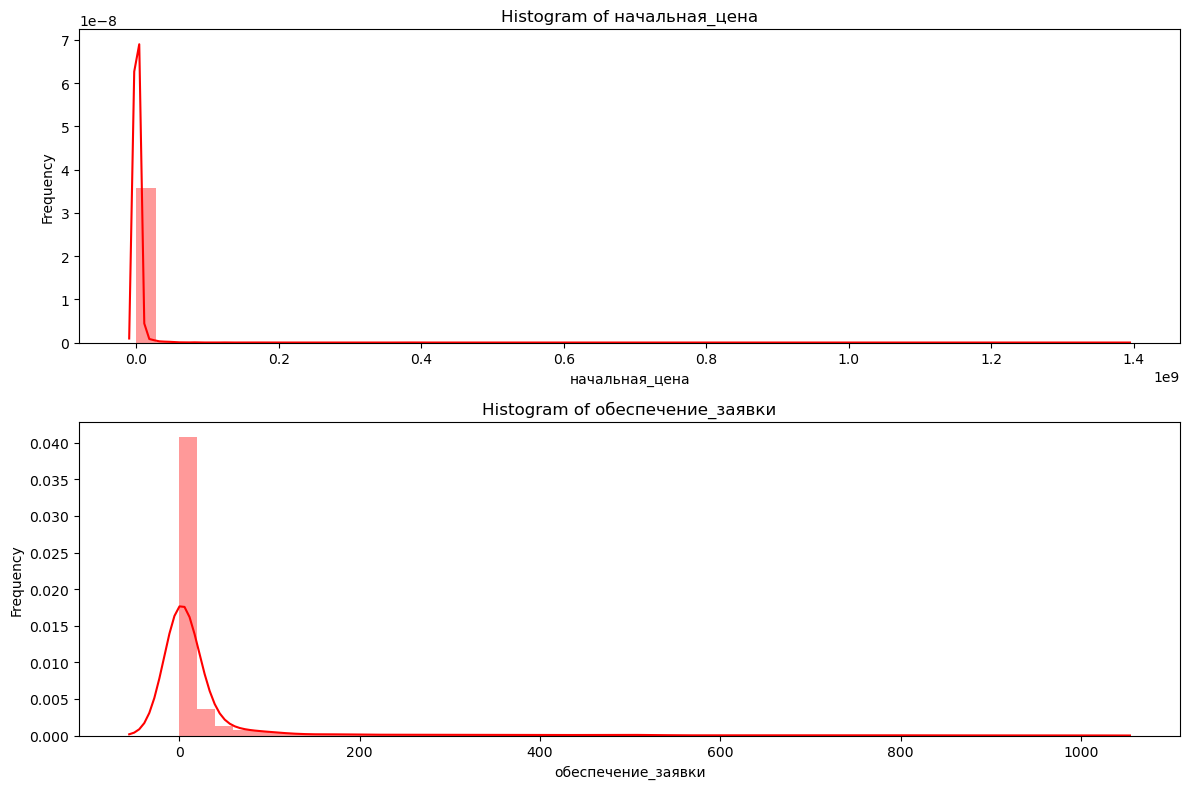

In [40]:
numeric_columns = ['начальная_цена', 'обеспечение_заявки']
# plot distplot of начальная_цена, обеспечение_заявки
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

for idx, column in enumerate(df[numeric_columns].columns):
    sns.distplot(df[column] ,color='red',label='bmi',ax=axes[idx])
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

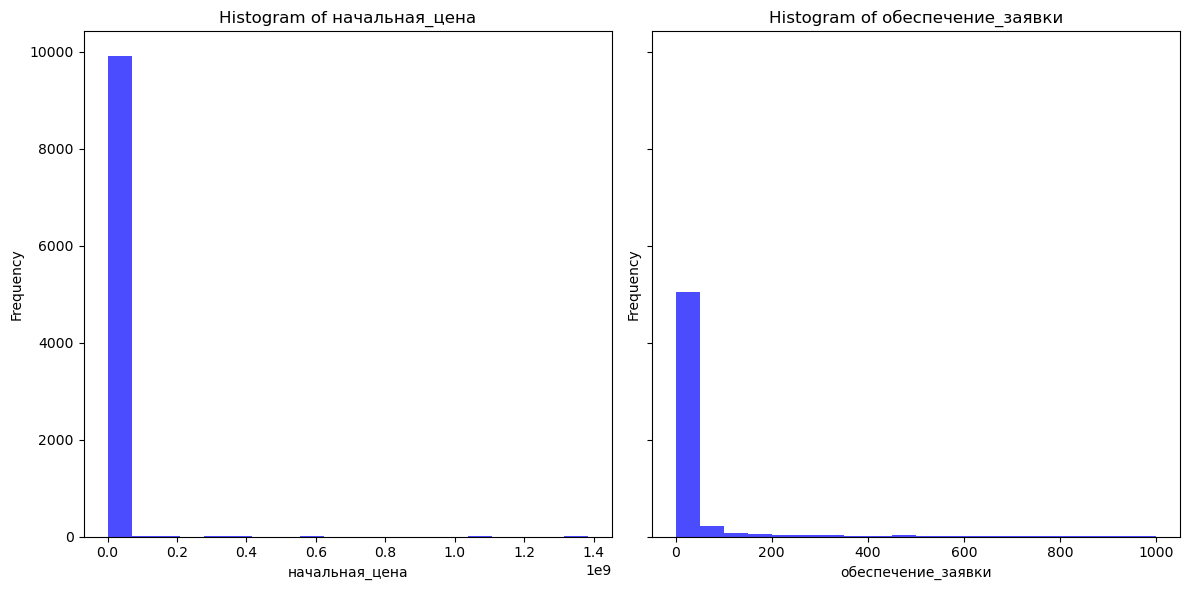

In [41]:
numeric_columns = ['начальная_цена', 'обеспечение_заявки']
# plot hist of начальная_цена, обеспечение_заявки
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for idx, column in enumerate(df[numeric_columns].columns):
    axes[idx].hist(df[column], bins=20, alpha=0.7, color='blue')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

In [42]:
# descriptive stat for numerical values
df.describe()

,rts_info_id,начальная_цена,обеспечение_заявки
count,9940.000000,9.940000e+03,5604.000000
mean,4970.500000,1.860125e+06,28.659350
std,2869.575172,2.152693e+07,103.919556
min,1.000000,0.000000e+00,0.000000
25%,2485.750000,3.000000e+04,0.000000
50%,4970.500000,1.364810e+05,0.000000
75%,7455.250000,6.150952e+05,12.000000
max,9940.000000,1.384281e+09,999.000000
